# Objective 

#### Analyze the data and draw conclusions on the distribution and nature of crime in Montreal City. 

## Insights to Gather

1. What are the top 3 prevalent crimes or offenses committed in Montreal City?
2. What part of the day did most crime incidents occur?
3. Which top 5 police precincts (PDQ) got the most crime complaints?
4. Which are the top 3 PDQs that got the least crime complaints?
5. Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?
6. Which neighborhood has the most cases of murder?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# importing csv and storing it under variable df
df = pd.read_csv('data/actes-criminels.csv')

# looking at ten random samples in the dataset
df.sample(n = 10, random_state = 42)

Categorie                       Category  \
239171  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
241143  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
71477   Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
220515                            Méfait                       Mischief   
145543  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
8442            Vol de véhicule à moteur         Theft of Motor Vehicle   
141468                    Vols qualifiés                        Robbery   
130051  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
126634                      Introduction            Breaking & Entering   
65022                     Vols qualifiés                        Robbery   

              Date Time of Day   PDQ           x            y   Latitude  \
239171  2022-01-21        nuit   5.0  286738.781  5034640.500 -73.730911   
241143  2022-01-13        soir  46.0  301170.719  5052541.000 -73.546533   
71477   2017-04-08        soir  35.0         NaN          NaN        NaN   
220515  2022-02-03        soir  26.0  296411.468  5039514.749 -73.607330   
145543  2019-10-20        nuit  38.0  298718.852  5040797.622 -73.577823   
8442    2016-02-01        nuit  39.0  294232.206  5049929.965 -73.635438   
141468  2019-05-29        jour  23.0  301924.195  5046352.614 -73.536836   
130051  2018-12-01        jour  38.0  297820.809  5042397.078 -73.589339   
126634  2019-09-15        jour  13.0  294577.750  5031274.500 -73.630621   
65022   2016-11-05        soir  21.0  299962.840  5041609.764 -73.561911   

        Longitude  
239171  45.451461  
241143  45.612761  
71477         NaN  
220515  45.495505  
145543  45.507073  
8442    45.589195  
141468  45.557079  
130051  45.521457  
126634  45.421331  
65022   45.514391

In [2]:
# taking a look at the landscape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244117 entries, 0 to 244116
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Categorie    244117 non-null  object 
 1   Category     244117 non-null  object 
 2   Date         244117 non-null  object 
 3   Time of Day  244117 non-null  object 
 4   PDQ          244112 non-null  float64
 5   x            202724 non-null  float64
 6   y            202724 non-null  float64
 7   Latitude     202724 non-null  float64
 8   Longitude    202724 non-null  float64
dtypes: float64(5), object(4)
memory usage: 16.8+ MB


In [3]:
# searching for null values by column
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x              41393
y              41393
Latitude       41393
Longitude      41393
dtype: int64

In [4]:
# getting a quick statistical overview of numerical values in dataset
# also rounding the decimals to the second decimal point
round(df.describe(),2)

PDQ          x           y   Latitude  Longitude
count  244112.00  202724.00   202724.00  202724.00  202724.00
mean       26.32  295794.17  5043227.57     -73.62      45.53
std        14.03    6085.98     6070.39       0.08       0.05
min         1.00  268109.61  5029291.47     -73.97      45.40
25%        15.00  293900.98  5039087.60     -73.64      45.49
50%        26.00  297338.25  5042878.08     -73.60      45.53
75%        39.00  299665.90  5047188.21     -73.57      45.56
max        55.00  306389.86  5062496.46     -73.48      45.70

## What are the Top 3 more prevalent crimes or offenses in Montreal city?

### Steps to get there

#### There are a couple of ways to build the table

+ Option 1: Create a table by calling on the Category column directly and using the .value_counts function
### OR
+ Option 2: Create a table grouped by the Category column and using the .count function 


### Next Steps

1. Now that we have the counts, it would be helpful to know what the population of Montreal City is (Google: 1,780,000)
2. Calculate each respective crime for every 100,000 MTL residents --- > (Crime Count/ 1,780,000 Million) * 100,000
3. The results aims to provide better context around the crime (Ie. For every 100,000 residents there will be 4,061 Thefts From / To Motor Vehicle)
4. Build a visual to display the results

In [5]:
# building a table by calling on the Category column directly and applying value_counts function
# renaming both columns
dt = df['Category'].value_counts().reset_index().rename({"index" : "Crime", "Category" : "Crime Count"}, axis = 1)
dt

Crime  Crime Count
0  Theft From / To Motor Vehicle        72291
1            Breaking & Entering        61107
2                       Mischief        53720
3         Theft of Motor Vehicle        43135
4                        Robbery        13639
5      Murder Resulting in Death          225

In [6]:
# creating a new column that will divide the crime count by the total population * 100000 to calculate the count by 100,000 residents
dt['per/100000'] = round((dt['Crime Count'] / 1_780_000) * 100000, 0).astype(int)

# ranking the crimes by the count descending the highest count at the top
dt['rank'] = dt['Crime Count'].rank(method = 'dense', ascending = False).astype(int)

# looking at the table to ensure the data adds up
dt

Crime  Crime Count  per/100000  rank
0  Theft From / To Motor Vehicle        72291        4061     1
1            Breaking & Entering        61107        3433     2
2                       Mischief        53720        3018     3
3         Theft of Motor Vehicle        43135        2423     4
4                        Robbery        13639         766     5
5      Murder Resulting in Death          225          13     6

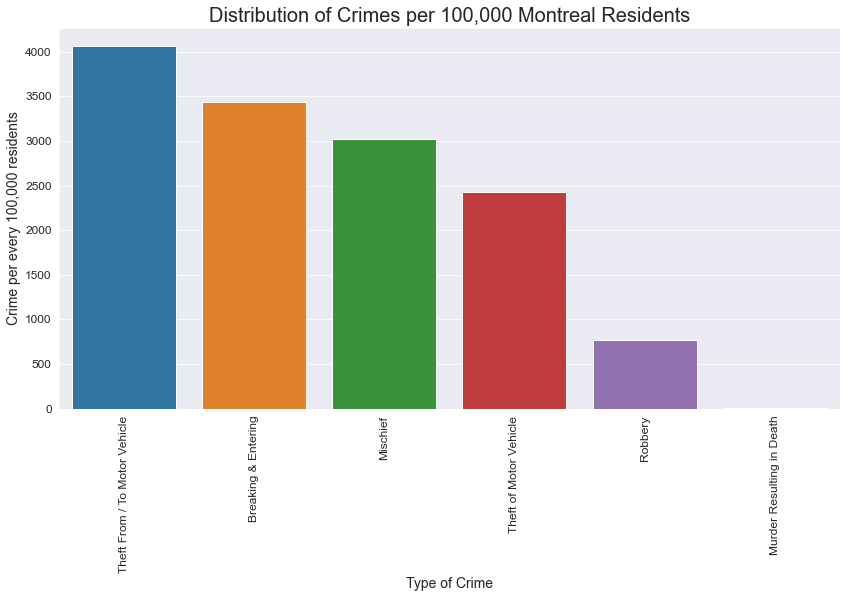

In [7]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will likely use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# creating a barplot using seaborn and passing the Crime and count per/100000 residents as the data source
sns.barplot(x = 'Crime', y = 'per/100000', data = dt, ax = ax)

# adding a title to the chart
plt.title('Distribution of Crimes per 100,000 Montreal Residents', fontdict = {'fontsize' : fontsize})

# renaming the y-axis and increasing the font size
plt.ylabel('Crime per every 100,000 residents', fontdict = {'fontsize' : axfont})

# renaming the x-axis and increasing the font sise
plt.xlabel('Type of Crime',  fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# rotating the axis labels to 90 degrees
plt.xticks(rotation = 90)

# displaying chart created
plt.show();

In [8]:
# filtering the table to see which are the three most prevalent crimes 
# since we used a rank function, specifically for this scenario all that needs to be done is filter by rank where it is <= 3
top_three_crimes =  dt[dt['rank'] <= 3]

top_three_crimes

Crime  Crime Count  per/100000  rank
0  Theft From / To Motor Vehicle        72291        4061     1
1            Breaking & Entering        61107        3433     2
2                       Mischief        53720        3018     3

In [9]:
# calculating the total sum of crimes per 100,000 MTL residents
total_crime_count = top_three_crimes['per/100000'].sum()

crimes = top_three_crimes

# printing out statement
print(f"The top three most prevalent crimes in Montreal make up for {total_crime_count} incidents for every 100,000 residents in Montreal City.")

The top three most prevalent crimes in Montreal make up for 10512 incidents for every 100,000 residents in Montreal City.


### Key Takeways

#### Objective: 3 Most Prevalent Crimes

1. Theft From / to Motor Vehicle
2. Breaking & Entering
3. Mischief

+ Making up for 10,512 Incidents for every 100,000 residents in the City

### Question 2: What part of the day did most incidents occur?

#### Next Steps

+ Build a table grouped by the time of day, counting the total number of incidents per time of day
+ Create a visual to display findings

In [10]:
time_of_day = df['Time of Day'].value_counts().reset_index().rename({"index" : "Time of Day" , "Time of Day" : "Incident Count"}, axis = 1)
time_of_day

Time of Day  Incident Count
0        jour          124382
1        soir           81612
2        nuit           38123

### Making a Change

+ Add a new column called Time of Day but in English for clarity


In [11]:
# creating a dictionary to map French time of day labels to English labels
day_dict = {"jour" : "day", "soir" : "evening", "nuit" : "night"}

# replace French time of day labels in the 'Time of Day' column with English labels
time_of_day['Time of Day (ENG)'] = time_of_day['Time of Day'].replace(day_dict)

# printing dataframe to ensure mapping worked correctly
time_of_day

Time of Day  Incident Count Time of Day (ENG)
0        jour          124382               day
1        soir           81612           evening
2        nuit           38123             night

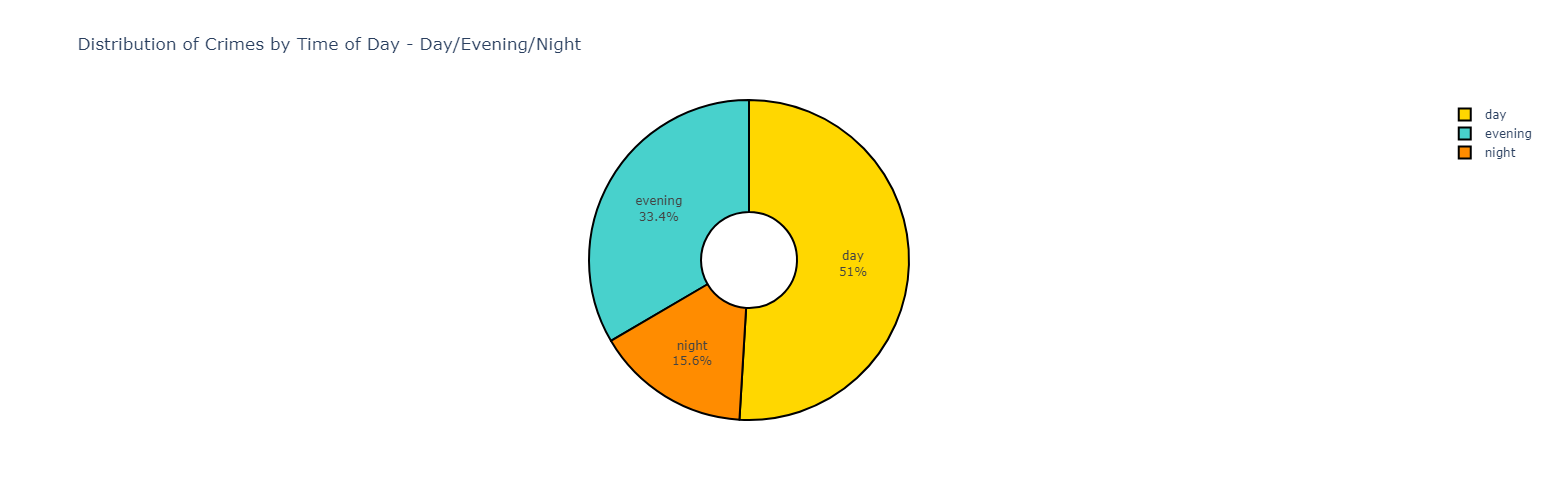

In [12]:
# importing plotly to create a pie chart visual
import plotly.express as px

# define a list of colours for the pie chart
colors = ['gold', 'mediumturquoise', 'darkorange']

# creating a pie chart using plotly express with time_of_day as the data source
fig = px.pie(data_frame = time_of_day, # data source
             values = 'Incident Count', # count by time of day 
             names = 'Time of Day (ENG)', # passing the English labels as the label 
             title = 'Distribution of Crimes by Time of Day - Day/Evening/Night', # setting the title for the pie chart
             width = 700, # width of the chart in pixels
             height = 500, # height of the chart in pixels
             hole = .3) # size of the donut hole

fig.update_traces(textposition = 'inside', # position of the text label within the pie chart
                  textinfo = 'percent+label', # format of the text labels in the chart
                  textfont_size=12, # font size of the tect labels in the chart
                  marker=dict(colors=colors, line=dict(color='#000000', width=2))) # properties of the lines separating the sections

# displaying styled chart
fig.show();

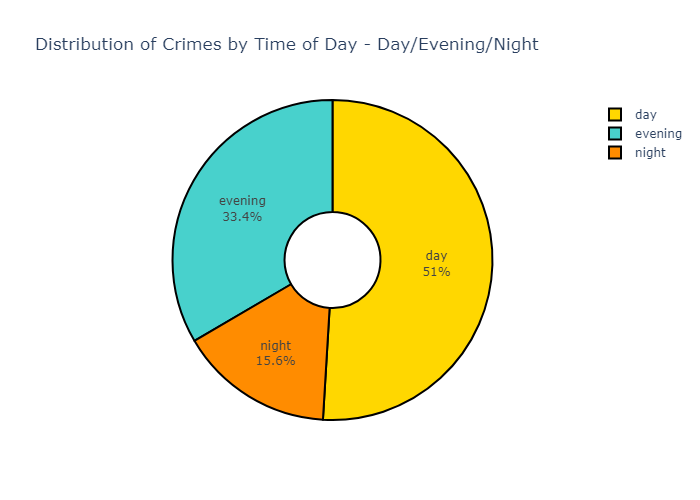

### Key Takeways

1. More than half of the crimes occur betweeen the times of 8AM to 4PM
2. 33.4% of crimes occur between 4:01 PM to Midnight
3. Lastly, 15.6% of crime occurred between 00:01 t0 8:00 AM

### Questions to consider:

+ At what time of day to the more severe crimes (Ie. Murder, or potential harm to innocent people) occurr?
+ Are there crime hot spots where the likelihood of crime is higher than in other areas?

### Question 3: Which Police Precincts (PDQ) got the most complaints?

#### Next Steps

+ Build a table grouped by the Police Precinct and the total count of crimes reported
+ Use the rank function and filter out by the Top 5 ranked Precinct based on crimes reported

In [13]:
df.sample(n = 10, random_state = 42)

Categorie                       Category  \
239171  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
241143  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
71477   Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
220515                            Méfait                       Mischief   
145543  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
8442            Vol de véhicule à moteur         Theft of Motor Vehicle   
141468                    Vols qualifiés                        Robbery   
130051  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
126634                      Introduction            Breaking & Entering   
65022                     Vols qualifiés                        Robbery   

              Date Time of Day   PDQ           x            y   Latitude  \
239171  2022-01-21        nuit   5.0  286738.781  5034640.500 -73.730911   
241143  2022-01-13        soir  46.0  301170.719  5052541.000 -73.546533   
71477   2017-04-08        soir  35.0         NaN          NaN        NaN   
220515  2022-02-03        soir  26.0  296411.468  5039514.749 -73.607330   
145543  2019-10-20        nuit  38.0  298718.852  5040797.622 -73.577823   
8442    2016-02-01        nuit  39.0  294232.206  5049929.965 -73.635438   
141468  2019-05-29        jour  23.0  301924.195  5046352.614 -73.536836   
130051  2018-12-01        jour  38.0  297820.809  5042397.078 -73.589339   
126634  2019-09-15        jour  13.0  294577.750  5031274.500 -73.630621   
65022   2016-11-05        soir  21.0  299962.840  5041609.764 -73.561911   

        Longitude  
239171  45.451461  
241143  45.612761  
71477         NaN  
220515  45.495505  
145543  45.507073  
8442    45.589195  
141468  45.557079  
130051  45.521457  
126634  45.421331  
65022   45.514391

In [14]:
# creating a table groupeed by 'PDQ' column, count the number of occurrences of each value in the 'Time of Day' column, reset the index, and rename the 'Time of Day' column to '# of Crime Complaints'
# sorting the dataframe by crime complaints descending 
top_pdqs = df.groupby('PDQ')['Time of Day'].count().reset_index().rename({"Time of Day" : "CrimeComplaints"}, axis = 1).sort_values(by = 'CrimeComplaints', ascending = False)

# calculating % of total complaints per precinct
top_pdqs['perc of total'] = round(top_pdqs['CrimeComplaints'] / top_pdqs['CrimeComplaints'].sum() * 100, 2)

# adding a new column called complaints_rank, which is the rank of the PDQ based on the crime complaints received and converting the data type to integer
# The closer you are to 1, the higher amount of complaints received
top_pdqs['complaints_rank'] = top_pdqs['CrimeComplaints'].rank(method = 'dense', ascending = False).astype(int)

# converting PDQ into an integer from a float
top_pdqs['PDQ'] = top_pdqs['PDQ'].astype(int)

# printing out statement to understand total # of crime complaints
total_complaints = round((top_pdqs['CrimeComplaints'].sum() / 1_780_000) * 100000, 0)
print(f"The total # of Crime Complaints in Montreal City is {total_complaints} per 100,000 residents.")

# printing out table
top_pdqs

The total # of Crime Complaints in Montreal City is 13714.0 per 100,000 residents.


PDQ  CrimeComplaints  perc of total  complaints_rank
24   38            17265           7.07                1
14   21            14326           5.87                2
13   20            13593           5.57                3
30   48            11795           4.83                4
25   39            11149           4.57                5
4     7            11072           4.54                6
18   26            10460           4.28                7
27   44             9883           4.05                8
16   23             9505           3.89                9
11   15             9264           3.79               10
26   42             9219           3.78               11
19   27             8952           3.67               12
23   35             7816           3.20               13
21   31             7429           3.04               14
15   22             7419           3.04               15
20   30             7091           2.90               16
3     5             6905           2.83               17
31   49             6346           2.60               18
10   13             6207           2.54               19
12   16             5962           2.44               20
29   46             5698           2.33               21
28   45             5236           2.14               22
5     8             5220           2.14               23
9    12             5079           2.08               24
7    10             5002           2.05               25
1     3             4474           1.83               26
6     9             4404           1.80               27
8    11             3890           1.59               28
2     4             3119           1.28               29
22   33             2952           1.21               30
0     1             2808           1.15               31
17   24             2532           1.04               32
32   50             1950           0.80               33
33   55               90           0.04               34

## Crime Complaints Table Built

### Next Steps

+ Filter for the Top 5 Precincts that received the most complaints by calling on the 'complaints_rank' column directly
+ Filter for the rank being less or equal to 5, which will provide the answer for the Top 5 Precincts that receive the most crime complaints

### After

+ What about the Top 3 Police Precincts that received the least crime complaints?

In [15]:
# filtering the table for the top 5 ranked police precincts in terms of crime complaints
top_5_crimes = top_pdqs[top_pdqs['complaints_rank'] <= 5]

# calculating total % of crime complaints 
perc_of_crime_total = top_5_crimes['perc of total'].sum()

# displaying the table
top_5_crimes

PDQ  CrimeComplaints  perc of total  complaints_rank
24   38            17265           7.07                1
14   21            14326           5.87                2
13   20            13593           5.57                3
30   48            11795           4.83                4
25   39            11149           4.57                5

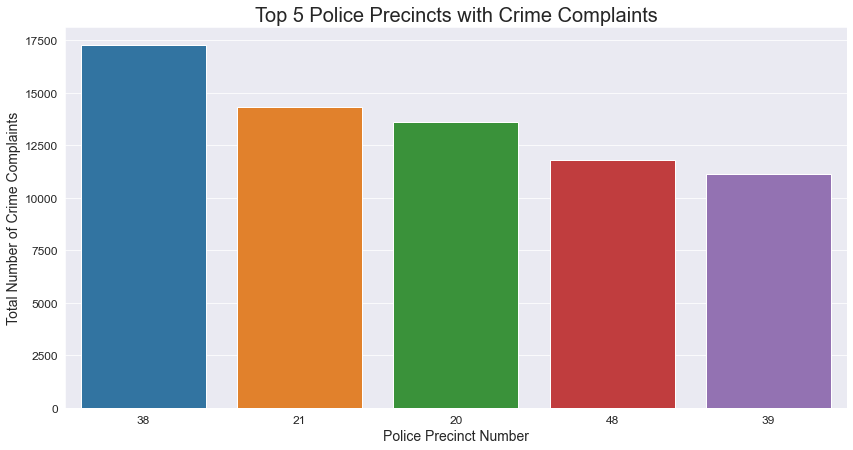

In [16]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ', y = 'CrimeComplaints', data = top_5_crimes, order = top_5_crimes.sort_values(by = 'CrimeComplaints', ascending = False).PDQ, ax = ax)

# adding a title to the plot
plt.title('Top 5 Police Precincts with Crime Complaints', fontdict = {'fontsize' : fontsize})

# adding a label to the x-axis
plt.xlabel('Police Precinct Number', fontdict = {'fontsize' : axfont})

# adding a label to the y-axis
plt.ylabel('Total Number of Crime Complaints', fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# displaying the plot
plt.show();

### Question 4: Which Police Precincts (PDQ) got the most complaints?

#### Next Steps

+ Sort the top_pdqs table by rank descending, which will bring the Precincts that received the least complaints first
+ Filter the Top 3 Precincts
+ This will give the answer on the Top 3 Precincts with the least complaints

In [17]:
# sorting the top_pdqs table by rank descending
top_pdqs = top_pdqs.sort_values(by = 'complaints_rank', ascending = False)

# creating a new table with the least complaints 
bottom_3_crimes = top_pdqs[top_pdqs['complaints_rank'] >= 32]

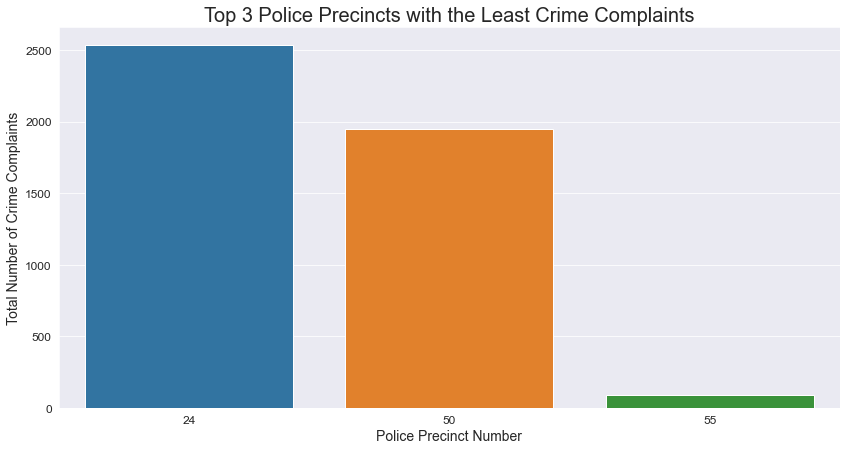

In [18]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ', y = 'CrimeComplaints', data = bottom_3_crimes, ax = ax)

# adding a title to the plot
plt.title('Top 3 Police Precincts with the Least Crime Complaints', fontdict = {'fontsize' : fontsize})

# adding a label to the x-axis
plt.xlabel('Police Precinct Number', fontdict = {'fontsize' : axfont})

# adding a label to the y-axis
plt.ylabel('Total Number of Crime Complaints', fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# displaying the plot
plt.show();

### Question 5: Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?

#### Important to know

+ How many null values are there in total?
+ What is the best way to deal with those values?
+ Using H3 and Folium, create a geospatial map that displays the areas with higher amounts of crime in comparison to those with lower crime
+ What are key insights that can be taken away from it?

In [19]:
import h3
import folium 

# displaying a random sample
df.sample(n = 10, random_state = 42)

# create a new column called 'hex_id' in df and fill it with hexagonal grid cell identifiers
# generated using the H3 library's 'geo_to_h3' function, applied to each row's 'origin_latitude' and 'origin_longitude' column
df['hex_id'] = df.apply(func = lambda row: h3.geo_to_h3(lat = row['Latitude'], lng = row['Longitude'], resolution = 8), axis = 1)
df.sample(n = 10, random_state = 42)

Categorie                       Category  \
239171  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
241143  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
71477   Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
220515                            Méfait                       Mischief   
145543  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
8442            Vol de véhicule à moteur         Theft of Motor Vehicle   
141468                    Vols qualifiés                        Robbery   
130051  Vol dans / sur véhicule à moteur  Theft From / To Motor Vehicle   
126634                      Introduction            Breaking & Entering   
65022                     Vols qualifiés                        Robbery   

              Date Time of Day   PDQ           x            y   Latitude  \
239171  2022-01-21        nuit   5.0  286738.781  5034640.500 -73.730911   
241143  2022-01-13        soir  46.0  301170.719  5052541.000 -73.546533   
71477   2017-04-08        soir  35.0         NaN          NaN        NaN   
220515  2022-02-03        soir  26.0  296411.468  5039514.749 -73.607330   
145543  2019-10-20        nuit  38.0  298718.852  5040797.622 -73.577823   
8442    2016-02-01        nuit  39.0  294232.206  5049929.965 -73.635438   
141468  2019-05-29        jour  23.0  301924.195  5046352.614 -73.536836   
130051  2018-12-01        jour  38.0  297820.809  5042397.078 -73.589339   
126634  2019-09-15        jour  13.0  294577.750  5031274.500 -73.630621   
65022   2016-11-05        soir  21.0  299962.840  5041609.764 -73.561911   

        Longitude           hex_id  
239171  45.451461  88f0e99013fffff  
241143  45.612761  88f0e981e5fffff  
71477         NaN                0  
220515  45.495505  88f0e98047fffff  
145543  45.507073  88f0e98023fffff  
8442    45.589195  88f0e9830bfffff  
141468  45.557079  88f0e981e3fffff  
130051  45.521457  88f0e98029fffff  
126634  45.421331  88f0e98231fffff  
65022   45.514391  88f0e981c1fffff

In [20]:
# understanding how many null values there are, particularly in latitude and longitude
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x              41393
y              41393
Latitude       41393
Longitude      41393
hex_id             0
dtype: int64

In [21]:
# storing the calculating in a variable for print statement
perc_null = round(df['Latitude'].isnull().sum() / df['Latitude'].count() * 100,2)

# printing out statement outlining the % of null values in the Latitude and longitude fields 
print(f"The percentage of null values for Latitude and Longitude is {perc_null}%")

The percentage of null values for Latitude and Longitude is 20.42%


## Takeaway

+ There are almost 41,400 crimes without a latitude and longitude
+ Considering there are 20% null values, the consideration now is how to deal with them
+ Are there specific PDQ's with higher counts of null values?

### What should be done with the null values

+ The danger is using an average or a median here, is that it is placing a crime in an area where it may not have actually happened
+ Due to the nature of the analysis, and the impact it can have on police precincts and potential resource allocation, it is best to move filter the blanks
+ Questions coming to mind:
+ Is the distribution of null values even across all precincts?
+ Or are there some precincts that have a much higher number of missing Latitude and Longitude coordinates

## Troubleshooting

#### We know the data came with the null values already, therefore..

+ Go back to the query that built this table and look for the root cause there first
+ Was it an outer join? Should it have been a left join?
+ Was the right table called?
+ Are there specific types of crime that don't have Latitude and Longitude?
+ Is the distribution of null values amongst precincts even? 
+ Or are there precincts with a much higher number of null values?


## Diving deeper 

+ Since the table below shows there are some precincts with a much higher counts of nulls than others, let's calculate the % of nulls per precinct
+ Build a table grouped by PDQ, and count the number of null values 
+ This can be done by filtering where the hex_id == 0, since there was no Latitude or Longitude to id
+ Build a table counting all hex_id instances, and calculate the % of nulls per PDQ

### What to do after

+ It may be worth calculating the % of nulls across all precincts, to understand who is above average
+ Once the findings are clear, and all troubleshooting has taken place, the next step is to ask for a better understanding as to why these happen

In [22]:
# filtering out the columns where hex = 0, which occurs when the Latitude and Longitude are missing
nulls = df[df['hex_id'] == '0']

# from that null table, grouping the data by police precinct and counting the total number of missing values by descending order
pdq_nulls = nulls.groupby('PDQ')['Date'].count().reset_index().rename({"Date" : "null count"}, axis = 1).sort_values(by = 'null count', ascending = False)

# converting the PDQ column from float to integer
pdq_nulls['PDQ'] = pdq_nulls['PDQ'].astype(int)

# displaying the table to understand the distribution amongst police precincts 
pdq_nulls

PDQ  null count
13   20        5344
14   21        4994
24   38        2880
18   26        1838
25   39        1799
30   48        1712
27   44        1652
11   15        1589
15   22        1580
16   23        1432
19   27        1431
20   30        1301
17   24        1270
21   31        1241
26   42        1210
23   35        1180
4     7        1073
9    12         927
10   13         694
31   49         676
28   45         675
12   16         655
7    10         627
5     8         548
8    11         537
3     5         486
22   33         479
29   46         472
6     9         400
1     3         299
2     4         197
0     1         190

### Null values, now what?

+ Build a table called total crimes which will be the entire data set grouped by precinct and counting the total number of crimes reported
+ Merge the nulls table on the PDQ (Police Precinct)
+ Calculate the total % of nulls per Police Precinct and store it in a new column

### Worth exploring further..

+ Calculate the average and median percentage of null values
+ Since there seem to be outliers in both directions, the distribution could be positive or negative
+ Depending on the outcome, the median may be a better option

In [23]:
# creating a table grouping all reported crimes by precinct
total_crimes = df.groupby('PDQ')['hex_id'].count().reset_index().rename({"hex_id" : "total crimes"}, axis = 1)

# converting the PDQ column from float to integer
total_crimes['PDQ'] = total_crimes['PDQ'].astype(int) 

# merging the total crimes table with the nulls on the Police Precinct number which is the unique identifier
total_crimes = pd.merge(total_crimes, pdq_nulls, how = 'left', on = 'PDQ')

# there are 2 NaNs in the null count column 
# filling in the NaN values with 0 on the null count column
total_crimes['null count'] = total_crimes['null count'].fillna(0)

# converting the null count column from float to integer
total_crimes['null count'] = total_crimes['null count'].astype(int)

# calculating the percntage of null values for every precinct and storing it in a new column and rounding it to the 2 nearest decimal
total_crimes['perc null'] = round(total_crimes['null count'] / total_crimes['total crimes'] * 100, 2)

# sorting the data by percentage of null values descending
# in other words, the precincts with the highest percentage of null values missing at the top
total_crimes = total_crimes.sort_values(by = 'perc null', ascending = False)

# displaying the table to ensure the descending order worked
total_crimes

PDQ  total crimes  null count  perc null
17   24          2532        1270      50.16
13   20         13593        5344      39.31
14   21         14326        4994      34.86
15   22          7419        1580      21.30
20   30          7091        1301      18.35
9    12          5079         927      18.25
18   26         10460        1838      17.57
11   15          9264        1589      17.15
27   44          9883        1652      16.72
21   31          7429        1241      16.70
24   38         17265        2880      16.68
22   33          2952         479      16.23
25   39         11149        1799      16.14
19   27          8952        1431      15.99
23   35          7816        1180      15.10
16   23          9505        1432      15.07
30   48         11795        1712      14.51
8    11          3890         537      13.80
26   42          9219        1210      13.13
28   45          5236         675      12.89
7    10          5002         627      12.53
10   13          6207         694      11.18
12   16          5962         655      10.99
31   49          6346         676      10.65
5     8          5220         548      10.50
4     7         11072        1073       9.69
6     9          4404         400       9.08
29   46          5698         472       8.28
3     5          6905         486       7.04
0     1          2808         190       6.77
1     3          4474         299       6.68
2     4          3119         197       6.32
32   50          1950           0       0.00
33   55            90           0       0.00

In [24]:
# calculating the median percentage of null values per precinct
median_null = round(total_crimes['perc null'].median(), 2)

# calculating the mean percentage of null values per precinct
avg_null = round(total_crimes['perc null'].mean(), 2)

# printing out a statement with both the median and mean to understand the distribution
print(f"The median for missing Latitude and Longitude coordinates is {median_null}. Meanwhile the mean is {avg_null}")

The median for missing Latitude and Longitude coordinates is 14.16. Meanwhile the mean is 14.99


In [25]:
# creating a function to label the precinct as below, average, or above average based on the precincts average missing coordinates
def label_pdq(nulls):
    if nulls > avg_null:
        return 'Above Average'
    elif nulls < avg_null:
        return 'Below Average'
    else:
        'Average'
        
total_crimes['PDQ nulls'] = total_crimes['perc null'].apply(label_pdq)

total_crimes

PDQ  total crimes  null count  perc null      PDQ nulls
17   24          2532        1270      50.16  Above Average
13   20         13593        5344      39.31  Above Average
14   21         14326        4994      34.86  Above Average
15   22          7419        1580      21.30  Above Average
20   30          7091        1301      18.35  Above Average
9    12          5079         927      18.25  Above Average
18   26         10460        1838      17.57  Above Average
11   15          9264        1589      17.15  Above Average
27   44          9883        1652      16.72  Above Average
21   31          7429        1241      16.70  Above Average
24   38         17265        2880      16.68  Above Average
22   33          2952         479      16.23  Above Average
25   39         11149        1799      16.14  Above Average
19   27          8952        1431      15.99  Above Average
23   35          7816        1180      15.10  Above Average
16   23          9505        1432      15.07  Above Average
30   48         11795        1712      14.51  Below Average
8    11          3890         537      13.80  Below Average
26   42          9219        1210      13.13  Below Average
28   45          5236         675      12.89  Below Average
7    10          5002         627      12.53  Below Average
10   13          6207         694      11.18  Below Average
12   16          5962         655      10.99  Below Average
31   49          6346         676      10.65  Below Average
5     8          5220         548      10.50  Below Average
4     7         11072        1073       9.69  Below Average
6     9          4404         400       9.08  Below Average
29   46          5698         472       8.28  Below Average
3     5          6905         486       7.04  Below Average
0     1          2808         190       6.77  Below Average
1     3          4474         299       6.68  Below Average
2     4          3119         197       6.32  Below Average
32   50          1950           0       0.00  Below Average
33   55            90           0       0.00  Below Average

In [26]:
pdq_labels = total_crimes.groupby('PDQ nulls')['null count'].count().reset_index().rename({"null count" : "count"}, axis = 1)

pdq_labels

PDQ nulls  count
0  Above Average     16
1  Below Average     18

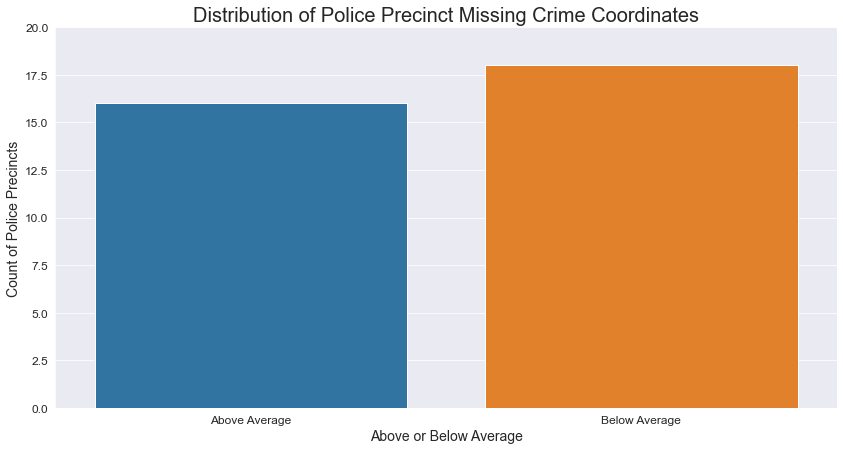

In [27]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ nulls', y = 'count', data = pdq_labels, ax = ax)

# adding a title to the plot
plt.title('Distribution of Police Precinct Missing Crime Coordinates', fontdict = {'fontsize' : fontsize})

# adding a label to the x-axis
plt.xlabel('Above or Below Average', fontdict = {'fontsize' : axfont})

# adding a label to the y-axis
plt.ylabel('Count of Police Precincts', fontdict = {'fontsize' : axfont})

# updating the range on the y-axis to 20
plt.ylim(0, 20)

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# displaying the plot
plt.show();

In [28]:
hexes = df.groupby('hex_id')['PDQ'].count().reset_index().rename({"PDQ" : "crime count"}, axis = 1)

hexes = hexes[hexes['hex_id'] > '0'].sort_values(by = 'crime count', ascending = False)

hexes.sample(n = 10, random_state = 42)

hex_id  crime count
223  88f0e990e9fffff          220
171  88f0e98a9dfffff          328
42   88f0e98101fffff          151
306  88f0ed28cbfffff          191
314  88f0ed2a81fffff           11
290  88f0ed2897fffff            3
334  88f0ed2ac1fffff           10
56   88f0e98135fffff           79
24   88f0e98043fffff          609
165  88f0e98a91fffff          163

In [29]:
m = folium.Map(location=[df['Longitude'].median(), df['Latitude'].median()],
                 zoom_start = 10,  # after a bit of experimentation, thought this presents the map best
                 tiles = "openstreetmap")

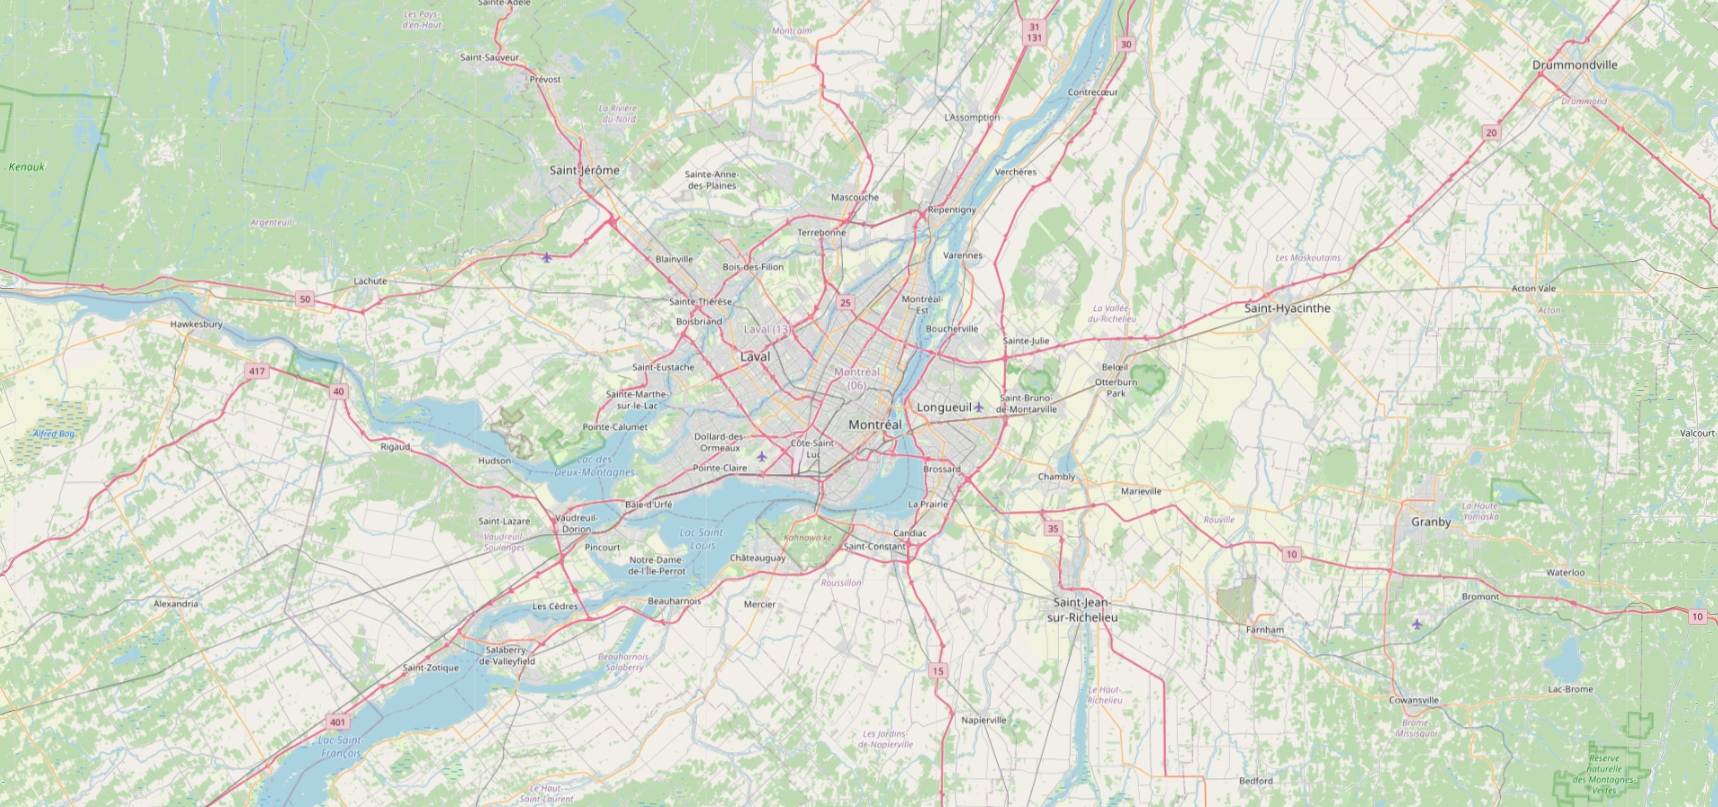